# Intial data generation trials in 2D

In [4]:
import sys  # isort:skip

sys.path.insert(0, "../")  # isort:skip

import pickle
from math import pi

import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns 
import sympy
# from sympy import cos, sin, symbols

from synthetic_data.synthetic_data import make_tabular_data

### Without correlation

In [5]:
# define symbols
# x1, x2 = symbols("x1 x2")

# define expression
expr = "cos(x1 ** 2 * pi / 180.0) - sin(x2 * pi / 180.0) + x1 * x2"

# define mapping from symbols to column of X - clunky TODO - make it better
col_map = {"x1": 0, "x2": 1}


In [6]:
# define correlations via covariance matrix
cov = np.array([[1.0, 0.0], [0.0, 1.0]])

In [7]:
n_samples = 1000
p_thresh = 0.5   # probability threshold to divide class 0 from class 1
# every other parameter is going to use the default - check docstring for completion

In [8]:
X, y_reg, y_prob, y_label = make_tabular_data(n_samples=n_samples, cov=cov, col_map=col_map, expr=expr, p_thresh=p_thresh)


### With correlation

In [9]:
cov_c = np.array([[1.0, 0.5], [0.5, 1.0]])

In [58]:
X_c, y_reg_c, y_prob_c, y_label_c = make_tabular_data(n_samples=n_samples, cov=cov_c, col_map=col_map, expr=expr, p_thresh=p_thresh)

### Let's see what we got!
#### Uncorrelated inputs

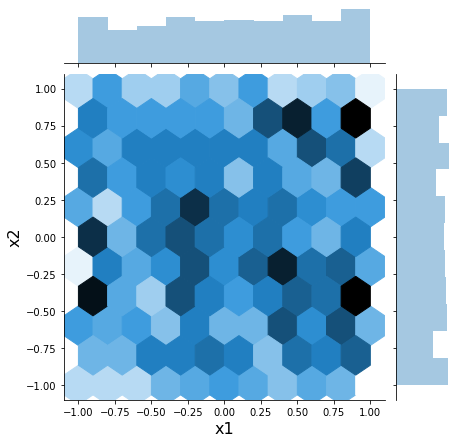

In [16]:
h = sns.jointplot(X[:, 0], X[:, 1], kind="hex", stat_func=None)
h.set_axis_labels("x1", "x2", fontsize=16)

#### Correlated inputs

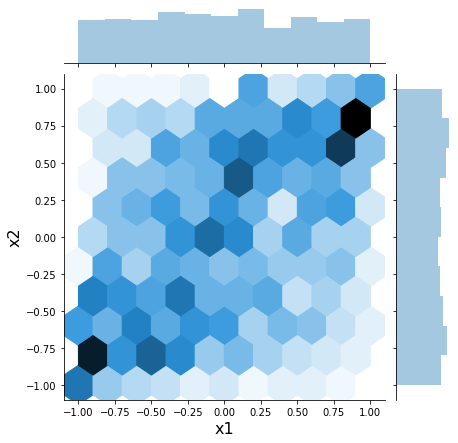

In [18]:
h = sns.jointplot(X_c[:, 0], X_c[:, 1], kind="hex", stat_func=None)
h.set_axis_labels("x1", "x2", fontsize=16)

## Let's check the impact on y_reg

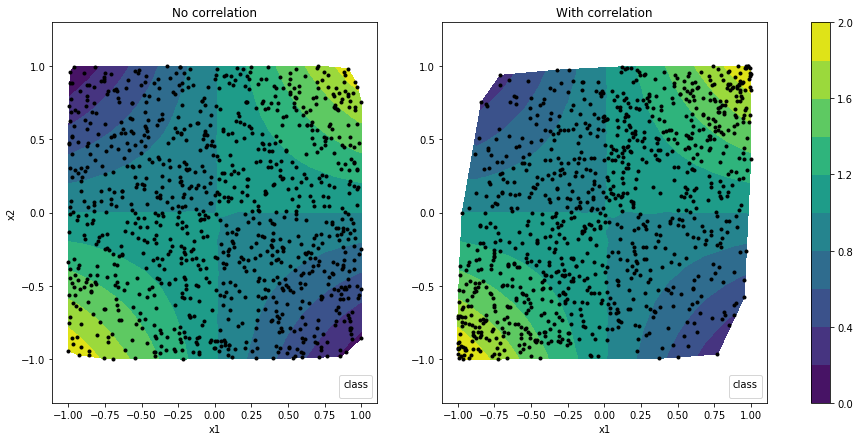

In [38]:
levels = np.arange(0, 2.2, 0.2)
fig, ax = plt.subplots(nrows = 1, ncols=2, figsize=(16, 7))
tri1 = ax[0].tricontourf(X[:, 0], X[:, 1], y_reg, levels=levels)
scatter = ax[0].scatter(X[:, 0], X[:, 1], c='k', label=y_label, marker=".")
leg1 = ax[0].legend(*scatter.legend_elements(), loc="lower right", title="class")
#cbar1 = fig.colorbar(tri1, ax=ax)
ax[0].set_title("No correlation")
ax[0].set_xlabel("x1")
ax[0].set_ylabel("x2")
ax[0].axis('equal')
#cbar1.formatter.set_powerlimits((0, 0))
#cbar1.update_ticks()

tri1 = ax[1].tricontourf(X_c[:, 0], X_c[:, 1], y_reg_c, levels=levels)
scatter = ax[1].scatter(X_c[:, 0], X_c[:, 1], c='k', label=y_label, marker=".")
leg1 = ax[1].legend(*scatter.legend_elements(), loc="lower right", title="class")
cbar1 = fig.colorbar(tri1, ax=ax)
ax[1].set_title("With correlation")
ax[1].set_xlabel("x1")
ax[1].axis('equal')
#ax[1].set_ylabel("x2")
#cbar1.formatter.set_powerlimits((0, 0))
cbar1.update_ticks()


You can see that the positive correlation has shifted density to the lower left and upper right.
But the contours remain in the same location (which is intended - the function f(X) doesn't change because we have correlation).

## Similar plots but with y_prob = sigmoid(y_reg)

This is the last step in the creation of our binary class labels.

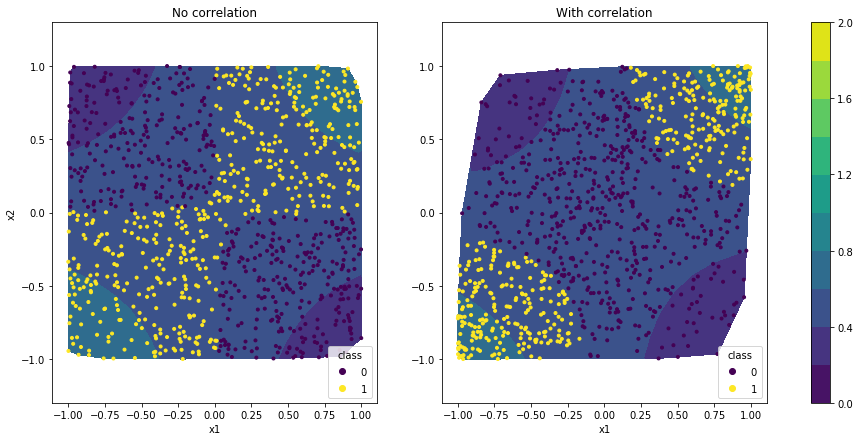

In [37]:
levels = np.arange(0, 2.2, 0.2)
fig, ax = plt.subplots(nrows = 1, ncols=2, figsize=(16, 7))
tri1 = ax[0].tricontourf(X[:, 0], X[:, 1], y_prob, levels=levels)
scatter = ax[0].scatter(X[:, 0], X[:, 1], c=y_label, label=y_label, marker=".")
leg1 = ax[0].legend(*scatter.legend_elements(), loc="lower right", title="class")
#cbar1 = fig.colorbar(tri1, ax=ax)
ax[0].set_title("No correlation")
ax[0].set_xlabel("x1")
ax[0].set_ylabel("x2")
ax[0].axis('equal')
#cbar1.formatter.set_powerlimits((0, 0))
#cbar1.update_ticks()

tri1 = ax[1].tricontourf(X_c[:, 0], X_c[:, 1], y_prob_c, levels=levels)
scatter = ax[1].scatter(X_c[:, 0], X_c[:, 1], c=y_label_c, label=y_label, marker=".")
leg1 = ax[1].legend(*scatter.legend_elements(), loc="lower right", title="class")
cbar1 = fig.colorbar(tri1, ax=ax)
ax[1].set_title("With correlation")
ax[1].set_xlabel("x1")
ax[1].axis('equal')
#ax[1].set_ylabel("x2")
#cbar1.formatter.set_powerlimits((0, 0))
cbar1.update_ticks()


### Wot?
Why don't our probabilities (and our labels) agree between the two plots?  
Answer: the sigmoid function has a parameter x_0 that 'centers' the sigmoid.
The default choice is `x_0 = np.mean(<some y_reg type vector here>)`


In [59]:
np.mean(y_reg)

0.9909529

In [60]:
np.mean(y_reg_c)

1.1620378

Those means are not the same, so the sigmoid won't be 'centered' the same way between the two datasets.

### Q: Are we generating balanced classes?

In [68]:
np.unique(y_label, return_counts=True)

(array([False,  True]), array([501, 499]))

In [69]:
np.unique(y_label_c, return_counts=True)

(array([False,  True]), array([583, 417]))

The baseline case with no correlation is balanced.  But the correlated case is skewed toward class 0.  So let's fix the value we use to center the sigmoid and recalculate...maybe that will rebalance the classes?

In [70]:
x_0_baseline = np.mean(y_reg)

In [71]:
X_3, y_reg_3, y_prob_3, y_label_3 = make_tabular_data(n_samples=n_samples, cov=cov_c, col_map=col_map, expr=expr, sig_x0=x_0_baseline, p_thresh=p_thresh)

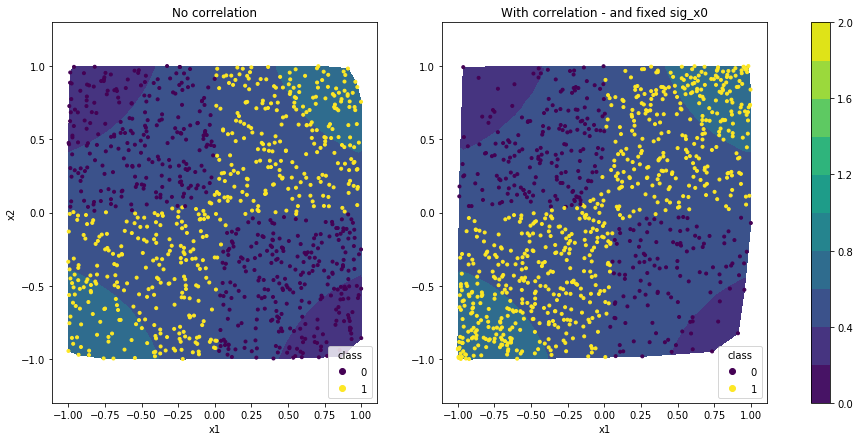

In [72]:
levels = np.arange(0, 2.2, 0.2)
fig, ax = plt.subplots(nrows = 1, ncols=2, figsize=(16, 7))
tri1 = ax[0].tricontourf(X[:, 0], X[:, 1], y_prob, levels=levels)
scatter = ax[0].scatter(X[:, 0], X[:, 1], c=y_label, label=y_label, marker=".")
leg1 = ax[0].legend(*scatter.legend_elements(), loc="lower right", title="class")
#cbar1 = fig.colorbar(tri1, ax=ax)
ax[0].set_title("No correlation")
ax[0].set_xlabel("x1")
ax[0].set_ylabel("x2")
ax[0].axis('equal')
#cbar1.formatter.set_powerlimits((0, 0))
#cbar1.update_ticks()

tri1 = ax[1].tricontourf(X_3[:, 0], X_3[:, 1], y_prob_3, levels=levels)
scatter = ax[1].scatter(X_3[:, 0], X_3[:, 1], c=y_label_3, label=y_label, marker=".")
leg1 = ax[1].legend(*scatter.legend_elements(), loc="lower right", title="class")
cbar1 = fig.colorbar(tri1, ax=ax)
ax[1].set_title("With correlation - and fixed sig_x0")
ax[1].set_xlabel("x1")
ax[1].axis('equal')
#ax[1].set_ylabel("x2")
#cbar1.formatter.set_powerlimits((0, 0))
cbar1.update_ticks()

### TADA! 

In [66]:
np.unique(y_label, return_counts=True)

(array([False,  True]), array([501, 499]))

In [67]:
np.unique(y_label_3, return_counts=True)

(array([False,  True]), array([305, 695]))

...but now we have significantly unbalanced the classes....